# Resale Price Data Analysis #

In [4]:
from matplotlib.cbook import sanitize_sequence
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
from scipy.stats import sem, pearsonr

First, see the median resale prices for a flat type over the years

Scraped 9360 data points
['town', 'flat_type', 'quarter', '_id', 'price']


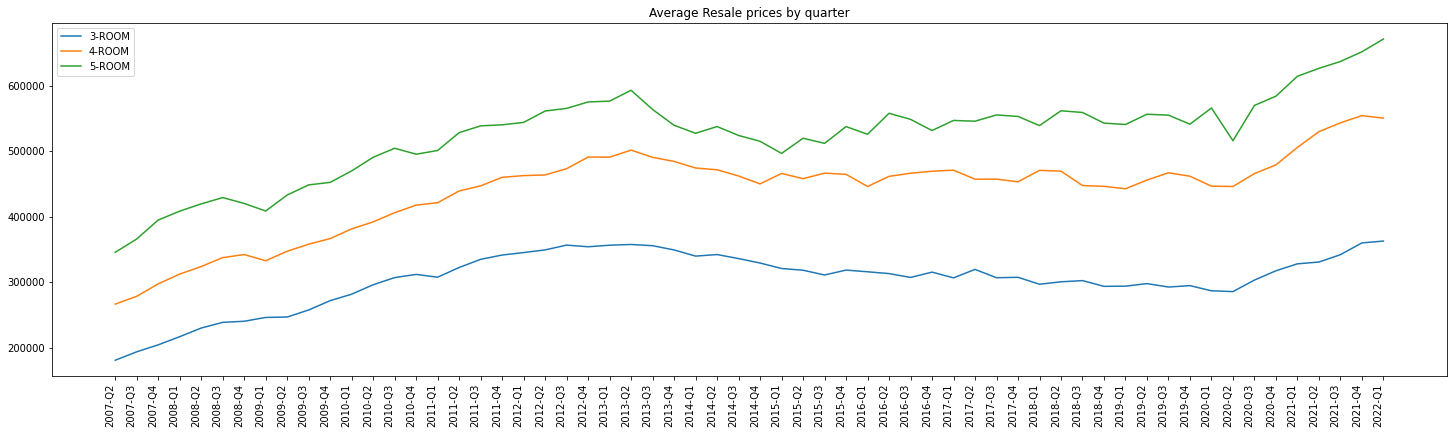

In [5]:
limit = 9360
response_API = requests.get('https://data.gov.sg/api/action/datastore_search?resource_id=a5ddfc4d-0e43-4bfe-8f51-e504e1365e27&limit=%s'%(limit))
data = response_API.text
data=json.loads(data)
data=data['result']['records']
print('Scraped %s data points'%(len(data)))
'''I am assuming the data is time-ordered'''
print(list(data[0].keys()))
##### Create the quarters #####
quarters = []
for i in range(len(data[1:])):
    # print(data[i]['quarter'])
    if data[i]['quarter'] not in quarters:
        quarters.append(data[i]['quarter'])
quarters.sort()
flattypes = ['3-ROOM','4-ROOM','5-ROOM']

quartdict = {}
for q in quarters:
    quartdict[q] = {}
    for f in flattypes:
        quartdict[q][f] = []

for d in data[1:]:
    if d['flat_type'].upper() in flattypes:
        if d['price']!='-' and d['price']!='na':
            # print(d['price'])
            quartdict[d['quarter']][d['flat_type'].upper()].append(int(d['price']))
##### Organize data #####
plotdict = {}
for f in flattypes:
    plotdict[f] = []
for q in quarters:
    for f in flattypes:
        plotdict[f].append(np.average(quartdict[q][f]))
# print(plotdict)

##### Plot stuff #####
plt.figure(figsize=(25,6.5))
for f in flattypes:
    plt.plot(plotdict[f],label=f)
plt.xticks(list(range(len(quarters))),quarters,rotation=90, ha='right')
plt.legend()
plt.title('Average Resale prices by quarter')
plt.show()

Other ways to see the resale price data, specifically for 4-room

In [11]:
startingyear=2017
currentyear=2022
currentmonth=11

'''GO to https://data.gov.sg/dataset/resale-flat-prices, check the total datapoints, then change limit below'''
limit = 238187
response_API = requests.get('https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3&limit=%s'%(limit))
data = response_API.text
data=json.loads(data)
data=data['result']['records']
print('Scraped %s data points'%(len(data)))
'''I am assuming the data is time-ordered'''
print(list(data[0].keys()))
#flat_types: '4 ROOM'
##### Create the months #####
months = []
for i in range(startingyear,currentyear):
    for j in range(1,13):
        if j<10:
            months.append('%s-0%s'%(i,j))
        else:
            months.append('%s-%s'%(i,j))
for j in range(1,currentmonth+1):
    if j<10:
        months.append('%s-0%s'%(currentyear,j))
    else:
        months.append('%s-%s'%(currentyear,j))    

datadict = {}
yearsleftdict = {}
priceperyearleft = {}
for month in months:
    datadict[month]=[]
    yearsleftdict[month]=[]
    priceperyearleft[month]=[]

##### Organize data #####

flattype = '4 ROOM'

for dat in data:
    if dat['flat_type'] == flattype:
        datadict[dat['month']].append(float(dat['resale_price']))
        yearsleftdict[dat['month']].append(float(dat['remaining_lease'][0:2]))
        priceperyearleft[dat['month']].append(float(dat['resale_price'])/float(dat['remaining_lease'][0:2]))

##### Plot stuff #####
means = []
meanstdevs = []

yearsleft = []
yearsleftstdevs = []

ppyl = []
ppylstdevs = []

for month in months:
    means.append(np.average(datadict[month]))
    meanstdevs.append(sem(datadict[month]))

    yearsleft.append(np.average(yearsleftdict[month]))
    yearsleftstdevs.append(sem(yearsleftdict[month]))

    ppyl.append(np.average(priceperyearleft[month]))
    ppylstdevs.append(sem(priceperyearleft[month]))    

Scraped 140642 data points
['town', 'flat_type', 'flat_model', 'floor_area_sqm', 'street_name', 'resale_price', 'month', 'remaining_lease', 'lease_commence_date', 'storey_range', '_id', 'block']


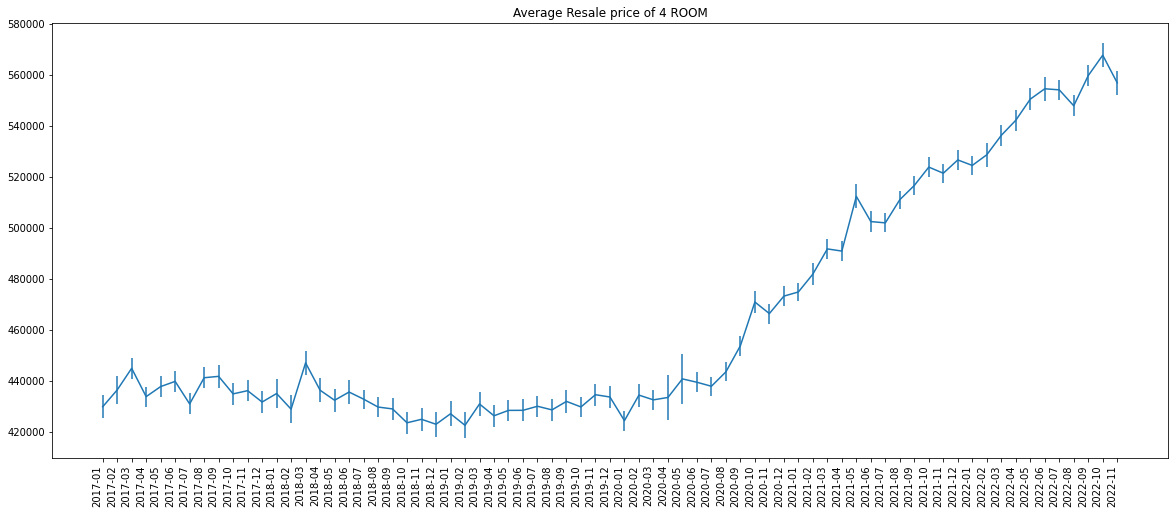

In [12]:
plt.figure(figsize=(20,8))
plt.errorbar(list(range(len(months))),means,yerr=meanstdevs)
plt.xticks(list(range(len(months))),months,rotation=90, ha='right')
plt.title('Average Resale price of %s'%(flattype))
plt.show()

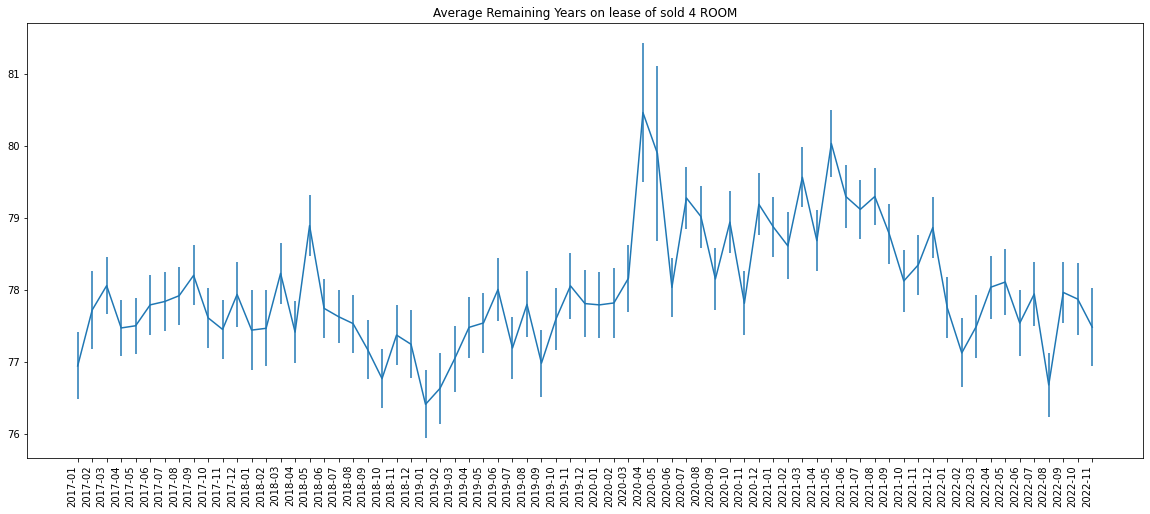

In [13]:
plt.figure(figsize=(20,8))
plt.errorbar(list(range(len(months))),yearsleft,yerr=yearsleftstdevs)
plt.xticks(list(range(len(months))),months,rotation=90, ha='right')
plt.title('Average Remaining Years on lease of sold %s'%(flattype))
plt.show()

Next graph is $\frac{\text{Resale Price}}{\text{Years remaining on lease}}$

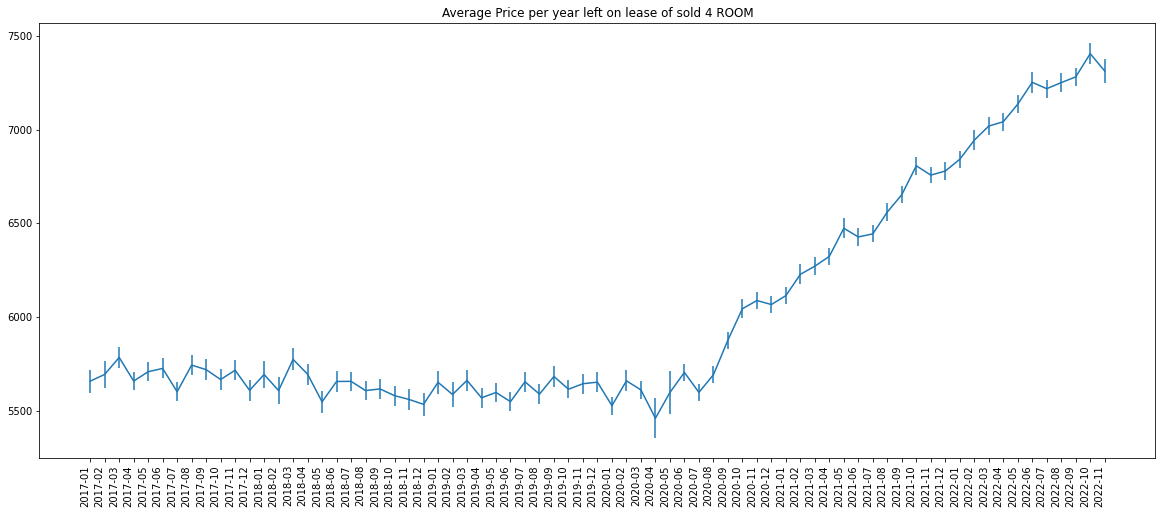

In [14]:
plt.figure(figsize=(20,8))
plt.errorbar(list(range(len(months))),ppyl,yerr=ppylstdevs)
plt.xticks(list(range(len(months))),months,rotation=90, ha='right')
plt.title('Average Price per year left on lease of sold %s'%(flattype))
plt.show()